# <b>0. IMPORTING LIBRARIES

In [22]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2 as cv
import random
from tqdm import tqdm

# <b> 1. Paths to directories and files

### 1.1 Donwloading the MNIST dataset from TF and preparing the directories to save the new dataset

In [2]:
#donwload dataset mnist
(x_train_ori, y_train_ori), (x_test_ori, y_test_ori) = tf.keras.datasets.mnist.load_data()
assert x_train_ori.shape == (60000, 28, 28)
assert x_test_ori.shape == (10000, 28, 28)
assert y_train_ori.shape == (60000,)
assert y_test_ori.shape == (10000,)

In [3]:
#files path in a dictionary
paths = dict()

paths['main'] = os.path.dirname('D:\Javi\Python\MNIST_OD')
paths['dataset'] = os.path.join(paths['main'], 'MNIST_dataset')
paths['train_data'] = os.path.join(paths['dataset'], 'train')
paths['test_data'] = os.path.join(paths['dataset'], 'test')
# paths['test_img'] = os.path.join(paths['test_data'], 'test')

### 1.2 Preparing the dataset to generate new data

In [4]:
#convert the raw data to a dataset-object

train = tf.data.Dataset.from_tensor_slices((x_train_ori,y_train_ori))
test = tf.data.Dataset.from_tensor_slices((x_test_ori,y_test_ori))

#genetating the input data format
BATCH = 5
FETCH = 6
SHUFFLE = 600


train = train.batch(BATCH).shuffle(SHUFFLE).prefetch(FETCH)
test = test.batch(BATCH).prefetch(FETCH)

2023-03-07 07:14:01.683265: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 2. Functions to preproccess images in to the new dataset

In [5]:
# function to rotate images

def rotate_image(image, angle, not_print = True):
    '''
    This function rotate the image and plot it
    Imput params:
        image = array like,
        angle = counterclockwise rotate angle (degrees),
        not_print = if 'True' do not plot an image
    Return:
        image = image rotated [array like]
    '''
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv.INTER_LINEAR)
    if not not_print:
        plt.imshow(result, cmap='gray')
        plt.show()
    return result

In [121]:
# function to create a dataset image

def image_generator(tf_dataset, number_of_images):
    for numb in tqdm(range(number_of_images)):
        images, labels = tf_dataset.as_numpy_iterator().next()
        numberOfImages = random.randint(1, 5)
        img = np.zeros((140, 140), dtype=np.uint8)
        indexOfImages = random.sample([1, 2, 3, 4, 5], numberOfImages)
        positionList = list()
        for noi in range(numberOfImages):
            rotationAngle = random.randint(-90, 90)
            scaleFactor = round((random.random()+0.5)*28)
            print(scaleFactor)
            size = (scaleFactor, scaleFactor)
            stopper = 0
            while stopper <= 5:
                x = random.randint(0, 140-scaleFactor)
                y = random.randint(0, 140-scaleFactor)
                print(x,y)
                positionCompromised = False
                for pos in positionList:
                    print('Scales',pos[2],scaleFactor)
                    print(x, y, x+scaleFactor, y+scaleFactor)
                    print(pos[0],pos[1],pos[0]+pos[2],pos[1]+pos[2])
                    if scaleFactor > pos[2]:
                        point1 = (pos[0] < x and pos[0] > x+scaleFactor) and (pos[1] < y and pos[1] > y+scaleFactor)
                        point2 = (pos[0]+pos[2] < x and pos[0]+pos[2] > x+scaleFactor) and (pos[1] < y and pos[1] > y+scaleFactor)
                        point3 = (pos[0]+pos[2] < x and pos[0]+pos[2] > x+scaleFactor) and (pos[1]+pos[2] < y and pos[1]+pos[2] > y+scaleFactor)
                        point4 = (pos[0] < x and pos[0] > x+scaleFactor) and (pos[1]+pos[2] < y and pos[1]+pos[2] > y+scaleFactor)
                    else:
                        point1 = (x < pos[0] and x > pos[0]+pos[2]) and (y < pos[1] and y > pos[1]+pos[2])
                        point2 = (x+scaleFactor < pos[0] and x+scaleFactor > pos[0]+pos[2]) and (y < pos[1] and y > pos[1]+pos[2])
                        point3 = (x+scaleFactor < pos[0] and x+scaleFactor > pos[0]+pos[2]) and (y+scaleFactor < pos[1] and y+scaleFactor > pos[1]+pos[2])
                        point4 = (x < pos[0] and x > pos[0]+pos[2]) and (y+scaleFactor < pos[1] and y+scaleFactor > pos[1]+pos[2])
                    if point1 or point2 or point3 or point4:
                        print('denegado')
                        positionCompromised = True
                    print(scaleFactor > pos[2],point1,point2,point3,point4)
                    # if not y_out:
                    #     positionCompromised = True
                if len(positionList) == 0:
                    positionList.append([x, y, scaleFactor])
                    img[x:x+scaleFactor, y:y+scaleFactor] = rotate_image(cv.resize(images[noi], size), 
                                                                         rotationAngle, not_print = False)
                    stopper = 10
                elif not positionCompromised:
                    print('Premio')
                    positionList.append([x, y, scaleFactor])
                    img[x:x+scaleFactor, y:y+scaleFactor] = rotate_image(cv.resize(images[noi], size), 
                                                                         rotationAngle, not_print = False)
                    stopper = 10
                stopper += 1
        plt.imshow(img)
        plt.show()

  0%|                                                     | 0/1 [00:00<?, ?it/s]

27
30 42


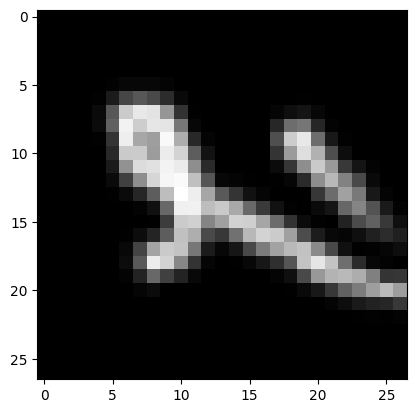

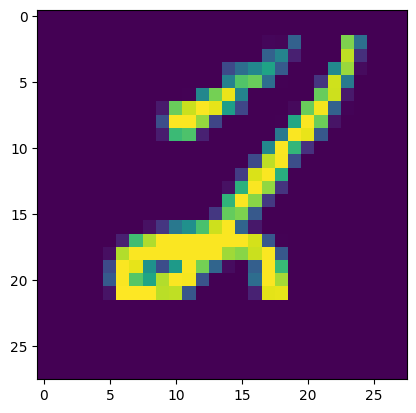

39
55 10
Scales 27 39
55 10 94 49
30 42 57 69
True False False False False
Premio


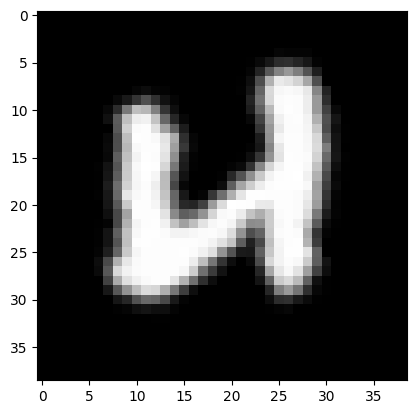

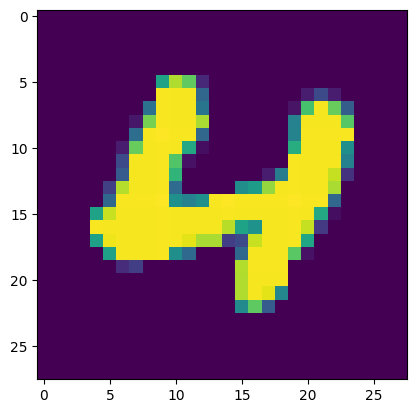

22
25 43
Scales 27 22
25 43 47 65
30 42 57 69
False False False False False
Scales 39 22
25 43 47 65
55 10 94 49
False False False False False
Premio


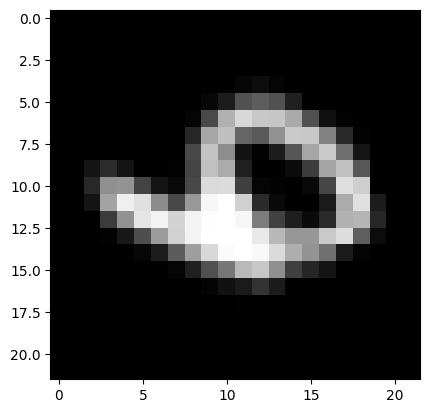

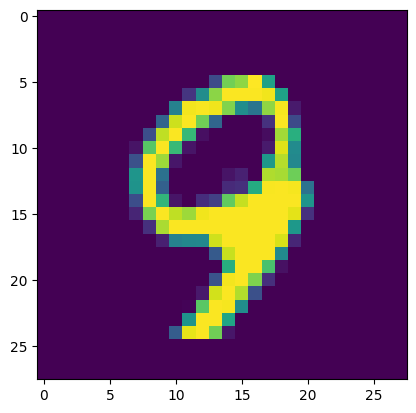

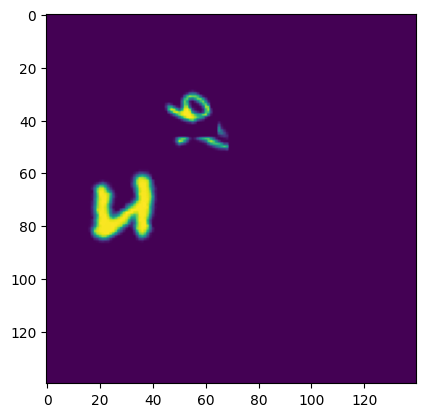

100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.35s/it]


In [120]:
#Creatting a seed, in order to get replicable solution
# random.seed(13)

image_generator(train, 1)


In [32]:
A, B = train.as_numpy_iterator().next()

In [33]:
type(B)

numpy.ndarray

In [19]:
numberOfImages = random.randint(1,5)
indexOfImages = random.sample([1,2,3,4,5],numberOfImages)
rotationAngle = random.randint(-90,90)
scaleFactor = random.random()+0.5
size = (round(scaleFactor*28),round(scaleFactor*28))
img = tf.zeros((140,140),dtype=np.uint8)

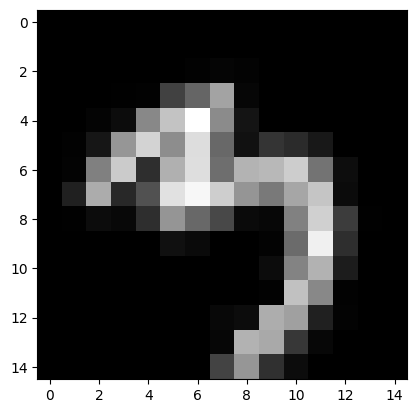

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   5,   3,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   2,  65,  99, 160,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   4,  12, 133, 192, 250, 136,  20,   0,   0,   0,   0,
          0,   0],
       [  0,   2,  22, 147, 207, 138, 216, 102,  17,  51,  42,  24,   0,
          0,   0],
       [  0,   3, 125, 199,  45, 172, 217, 108, 175, 180, 201, 113,  13,
          0,   0],
       [  0,  33, 168,  41,  80, 220, 242, 202, 146, 119, 163, 193,  11,
          0,   0],
       [  0,   1,  12,   8,  45, 146, 102,  71,  10,   7, 126, 204,  60,
          1,   0],
       [  0,   0,   0,   0,   0,  16,  10,   0,   0,   3, 105, 235,  45,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 128, 174,  28,
       

In [20]:
rotate_image(cv.resize(A[0],size), rotationAngle, not_print = False)

In [10]:
%config IPCompleter.use_jedi=False

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 7.7 MB/s eta 0:00:00


In [28]:
jaja = list([1,2,3])

In [29]:
for ja in jaja:
    print('joh')

joh
joh
joh


In [103]:
True or True or True or True

True

In [87]:
True or False

True

In [116]:
(True or True or False or True)

True